# Reduce Warehouse Space with the Pareto Principle using Python


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('1-2017.csv')
df.head()

,DATE FORMAT,ORDER_NUMBER,SKU,PCS
0,1/1/2017,835220,290731,1
1,1/1/2017,835220,373272,1
2,1/1/2017,835214,362101,1
3,1/1/2017,835215,215515,1
4,1/1/2017,835215,287995,1


In [10]:
print("{:,} order lines for {:,} orders".format(len(df), df.ORDER_NUMBER.nunique()))

144,339 order lines for 59,372 orders


#### Calculate Volume Prepared per SKU (BOX)

To plot the Pareto graph we need to

- Sum the number of boxes picked per SKU
- Sort your data frame by descending order on BOX/PCS quantity
- Calculate the cumulative sum of BOX/PCS
- Calculate the cumulative number of SKU

In [17]:
# BOX/SKU
df_par = pd.DataFrame(df.groupby(['SKU'])['PCS'].sum())
df_par.columns = ['PCS']

# Sort Values
df_par.sort_values(['PCS'], ascending = False, inplace = True)
df_par.reset_index(inplace = True)

# Cumulative Sum 
df_par['CumSum'] = df_par['PCS'].cumsum()

# % CumSum
df_par['%CumSum'] = (100 * df_par['CumSum']/df_par['PCS'].sum())

# % SKU
df_par['%SKU'] = (100 * (df_par.index + 1).astype(float)/(df_par.index.max() + 1))

print("Pareto Analysis for {:,} unique SKU".format(len(df_par)))
df_par.set_index('SKU').head()

Pareto Analysis for 4,864 unique SKU


,PCS,CumSum,%CumSum,%SKU
SKU,,,,
359803,4810,4810,2.911658,0.020559
290478,4132,8942,5.412898,0.041118
366639,4104,13046,7.897190,0.061678
359958,4062,17108,10.356058,0.082237
253500,3879,20987,12.704149,0.102796


In line 5 you can see that 0.1% of your SKU are representing 12.7% (20,987 Boxes).

# Visualization of the Pareto Principle

Text(0.5, 1.0, 'Pareto Analysis using Cumulative Sum of Boxes Prepared (%) = f(%SKU)')

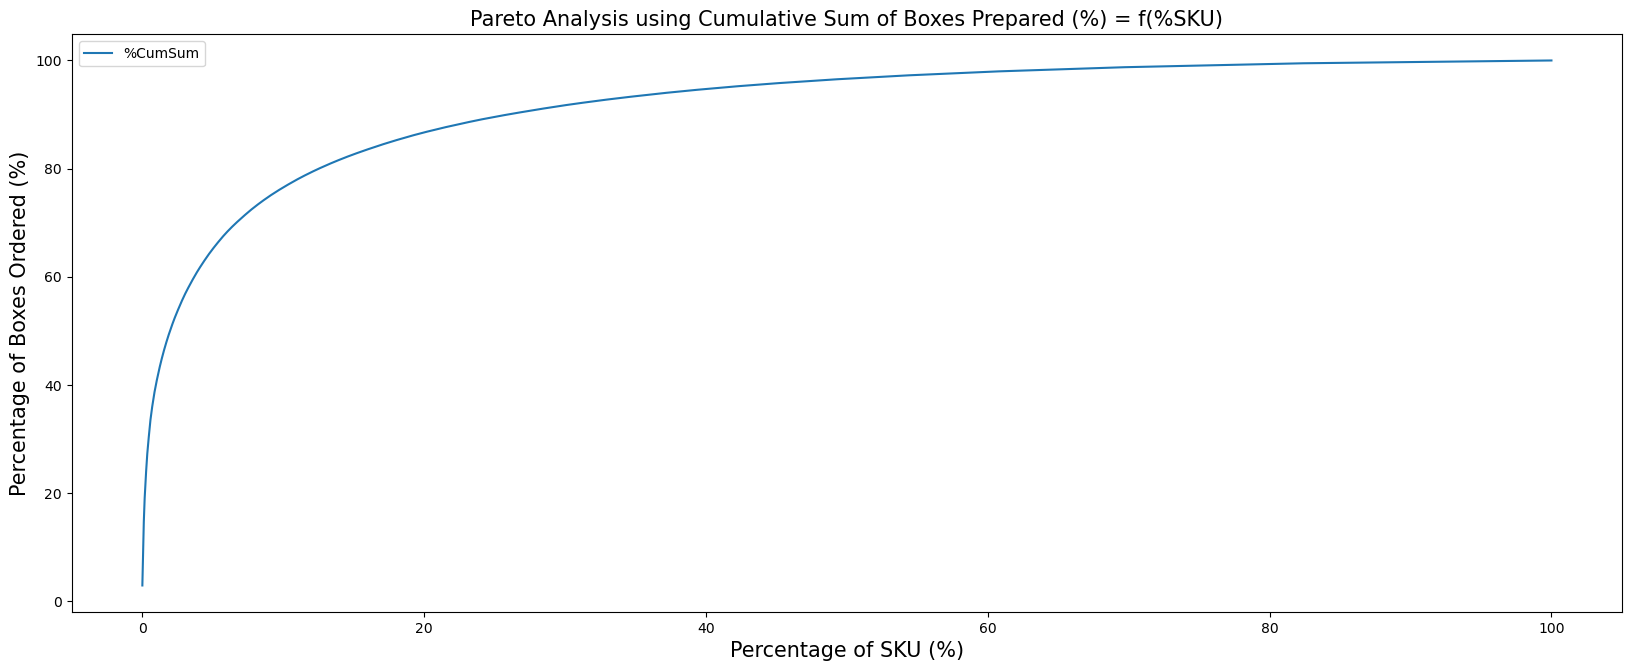

In [18]:
ax = df_par.plot(x='%SKU', y='%CumSum', figsize = (20,7.5))
plt.xlabel('Percentage of SKU (%)',fontsize=15)
plt.ylabel('Percentage of Boxes Ordered (%)',fontsize=15)
plt.title('Pareto Analysis using Cumulative Sum of Boxes Prepared (%) = f(%SKU)', fontsize = 15)

1. Marker 1: x = 20% of SKU (blue)
2. Marker 2: y = 80% of Boxes (red)

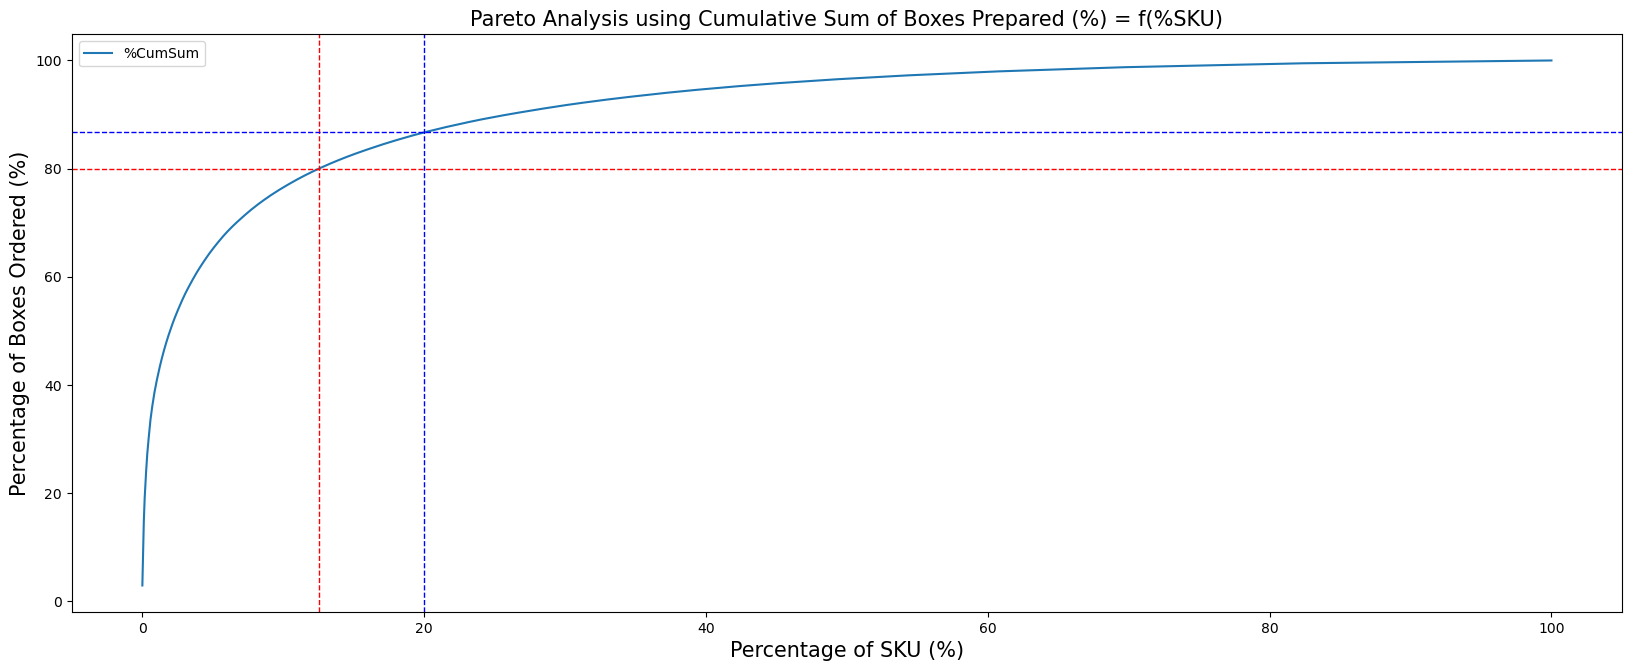

In [21]:
# > 80% Volume
df_par80 = df_par[df_par['%CumSum'] > 80].copy()
perc_sku80 = df_par80['%SKU'].min()
perc_sum80 = df_par80['%CumSum'].min()

# 20% SKU
df_sku20 = df_par[df_par['%SKU'] > 20].copy()
perc_sku20 = df_sku20['%SKU'].min()
perc_sum20 = df_sku20['%CumSum'].min()

ax = df_par.plot(x='%SKU', y='%CumSum', figsize = (20,7.5))
plt.xlabel('Percentage of SKU (%)',fontsize=15)
plt.ylabel('Percentage of Boxes Ordered (%)',fontsize=15)
plt.title('Pareto Analysis using Cumulative Sum of Boxes Prepared (%) = f(%SKU)', fontsize = 15)
# 80% Volume
ax.axhline(perc_sum80 , color="red", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku80, color="red", linestyle="--", linewidth = 1.0)
# 20% SKU
ax.axhline(perc_sum20 , color="blue", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku20, color="blue", linestyle="--", linewidth = 1.0)

- We can see that the threshold of 80% volume is already reached before having 20% of SKU (sku_80 = 12.55%).